In [1]:
# analisar tudo, só com o 2tri e com o 3tri

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

dash_fundamentus = pd.read_excel('estquant_fundamentus_gabriel.xlsx')
dash_fundamentus = dash_fundamentus.iloc[137:, :]
dash_fundamentus.columns

Index(['Cod', 'Ebit 1t', 'Ebit 2t', 'Ebit 2-1t', 'Ebit 1t Ltm', 'Ebit 2t Ltm',
       'Ebit 2-1t Ltm', 'Ebitda 1t', 'Ebitda 2t', 'Ebitda 2-1t',
       'Ebitda 1t Ltm', 'Ebitda 2t Ltm', 'Ebitda 2-1t Ltm', 'Cfo 1t', 'Cfo 2t',
       'Cfo 2-1t', 'Cfo 1t Ltm', 'Cfo 2t Ltm', 'Cfo 2-1t Ltm', 'Perf_pos2t',
       'Var_Ibov', 'Var_Small'],
      dtype='object')

In [2]:
# removendo outliers
for i in range(1, len(dash_fundamentus.columns)-3):
    dash_fundamentus.iloc[:, i] = dash_fundamentus.iloc[:, i].clip(lower=-2.5, upper=4)    

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


features = np.array(dash_fundamentus[[
    'Ebit 1t', 'Ebit 2t', 'Ebit 2-1t', 'Ebit 1t Ltm', 'Ebit 2t Ltm',
    'Ebit 2-1t Ltm', 'Ebitda 1t', 'Ebitda 2t', 'Ebitda 2-1t',
    'Ebitda 1t Ltm', 'Ebitda 2t Ltm', 'Ebitda 2-1t Ltm', 'Cfo 1t', 'Cfo 2t',
    'Cfo 2-1t', 'Cfo 1t Ltm', 'Cfo 2t Ltm', 'Cfo 2-1t Ltm'
    ]])

scaler = MinMaxScaler()
features_minmax = scaler.fit_transform(features)

scaler2 = StandardScaler()
features_normalizados = scaler2.fit_transform(features)

In [4]:
# definicao do target
def determine_quartile(value, quartil1, quartil2, quartil3):
    if value <= quartil1:
        return 1
    elif value <= quartil2:
        return 2
    elif value <= quartil3:
        return 3
    else:
        return 4

def input_label_classes(df):
    nome_acoes = np.array(df['Cod'])
    retorno_acoes = np.array(df['Perf_pos2t'])
    rank = (retorno_acoes - np.min(retorno_acoes)) / (np.max(retorno_acoes) - np.min(retorno_acoes))

    Q1 = np.percentile(rank, 25)
    Q2 = np.percentile(rank, 50) 
    Q3 = np.percentile(rank, 75)

    quartile_labels = np.array([determine_quartile(x, Q1, Q2, Q3) for x in rank])
    target= np.column_stack((nome_acoes, retorno_acoes, quartile_labels))
    return target

# target1 = input_label_classes(dash_fundamentus.iloc[0:137,:])
# target2 =  input_label_classes(dash_fundamentus.iloc[137:,:])
# target = np.vstack((target1, target2))
target = input_label_classes(dash_fundamentus)

# matriz para analise
X = np.column_stack([features, target[:,-2:]])
X = X.astype(float)

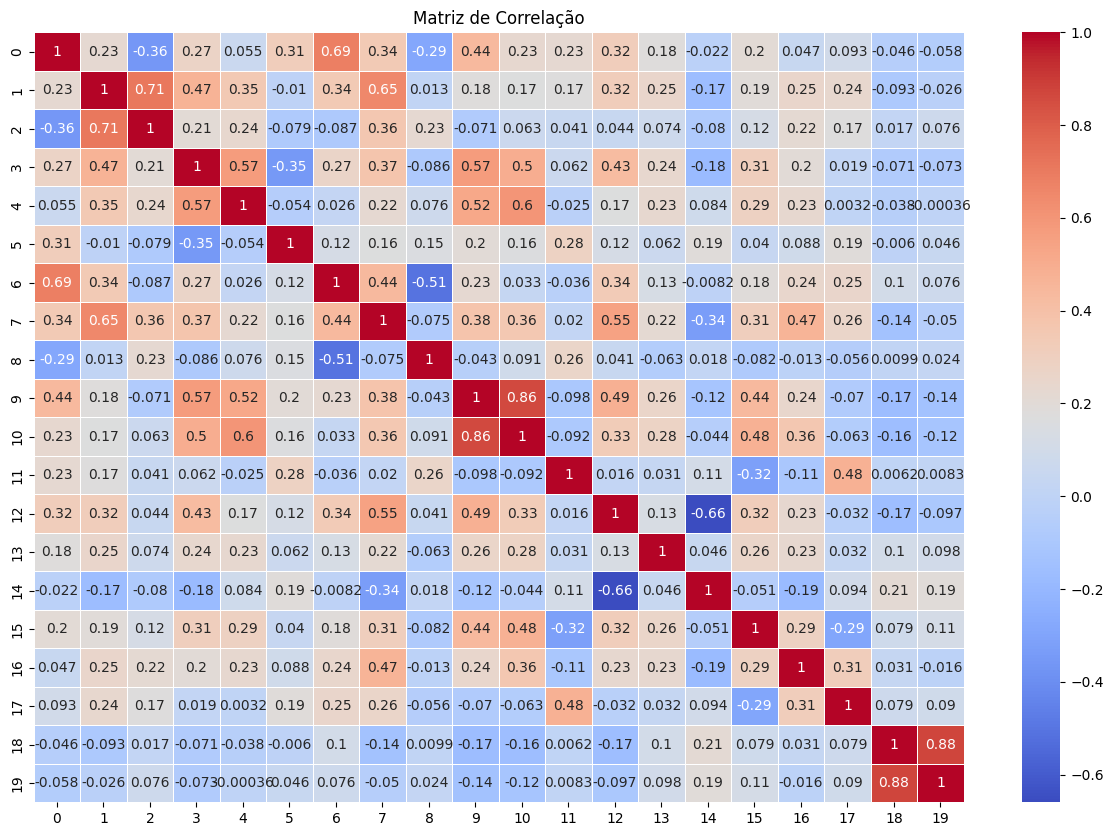

In [5]:
# matriz correl
df = pd.DataFrame(X)
correlation_matrix = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

# colunas com correl acima de 0.10
# 15, 4, 5, 

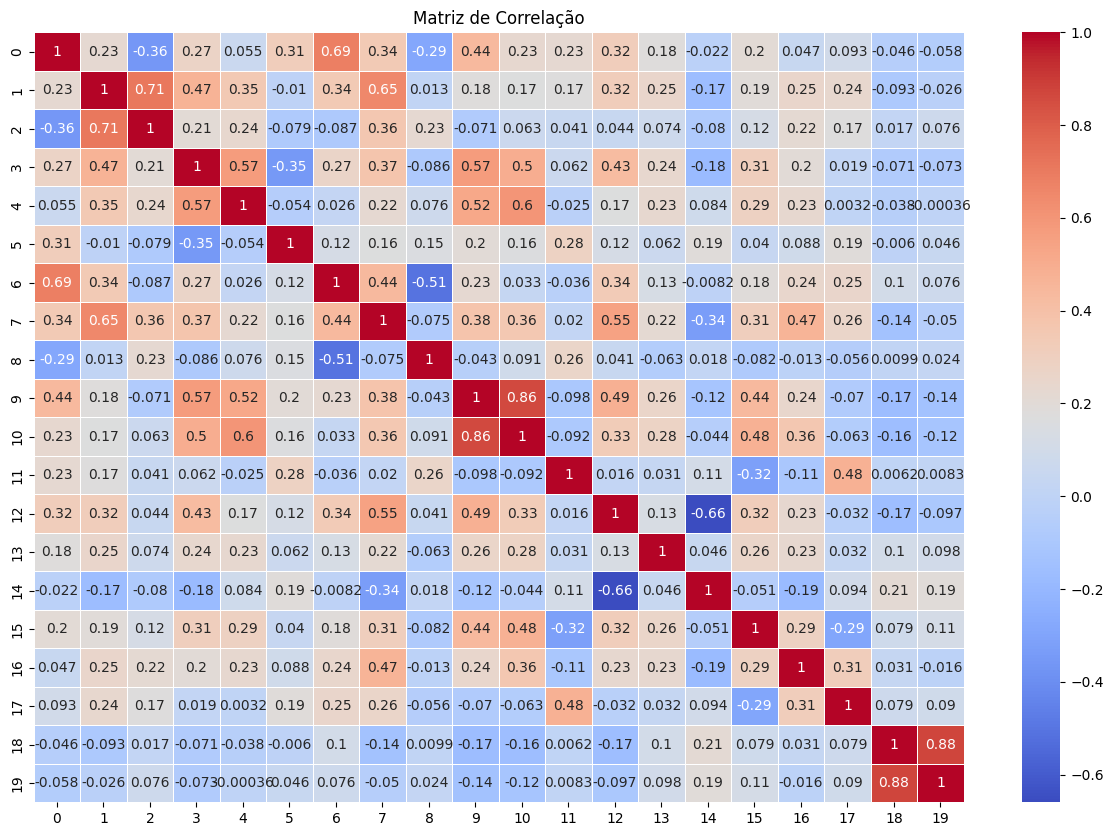

In [6]:
# matriz para analise
X = np.column_stack([features_minmax, target[:,-2:]])
X = X.astype(float)

# matriz correl
df = pd.DataFrame(X)
correlation_matrix = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

In [7]:
# definicao do target
def determine_quartile(value, quartil1, quartil2, quartil3):
    if value <= quartil1:
        return 1
    elif value <= quartil2:
        return 2
    elif value <= quartil3:
        return 3
    else:
        return 4

def input_label_classes(df, coluna):
    nome_acoes = np.array(df['Cod'])
    retorno_acoes1 = np.array(df['Perf_pos2t']) 
    retorno_acoes = np.array(df[coluna])
    rank = (retorno_acoes - np.min(retorno_acoes)) / (np.max(retorno_acoes) - np.min(retorno_acoes))

    Q1 = np.percentile(rank, 25)
    Q2 = np.percentile(rank, 50) 
    Q3 = np.percentile(rank, 75)

    quartile_labels = np.array([determine_quartile(x, Q1, Q2, Q3) for x in rank])
    target= np.column_stack((nome_acoes, retorno_acoes1, quartile_labels))
    return target

separacao_quartis = input_label_classes(dash_fundamentus.iloc[:,:], 'Ebit 1t')
separacao_quartis[:, -1]

X = np.array(separacao_quartis[:, -1])
lista = [ 'Ebit 1t', 'Ebit 2t', 'Ebit 2-1t', 'Ebit 1t Ltm', 'Ebit 2t Ltm',
       'Ebit 2-1t Ltm', 'Ebitda 1t', 'Ebitda 2t', 'Ebitda 2-1t',
       'Ebitda 1t Ltm', 'Ebitda 2t Ltm', 'Ebitda 2-1t Ltm', 'Cfo 1t', 'Cfo 2t',
       'Cfo 2-1t', 'Cfo 1t Ltm', 'Cfo 2t Ltm', 'Cfo 2-1t Ltm']

for i in range(1, features.shape[1]):
    separacao_quartis = input_label_classes(dash_fundamentus.iloc[:,:], lista[i])
    X = np.column_stack([X, separacao_quartis[:, -1]])
X = np.column_stack([X, target[:,-2:]])
X = X.astype(float)    

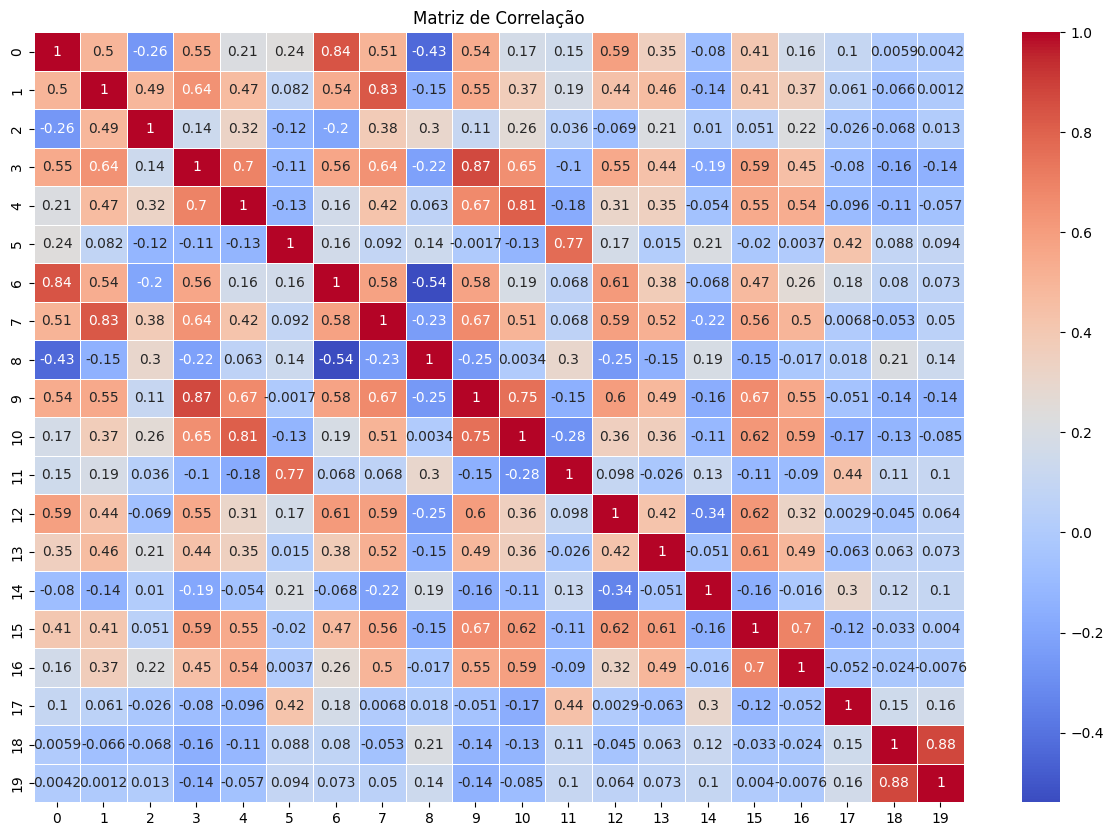

In [8]:
# matriz correl
df = pd.DataFrame(X)
correlation_matrix = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

# colunas com correl acima de 0.10
# 15, 4, 5, 

In [9]:
'Ebit 2-1t Ltm'
'Ebitda 2-1t Ltm'
'Cfo 2-1t Ltm'

'Cfo 2-1t Ltm'

In [10]:
a = X[X[:, 17]==4]
a = target[X[:, 17]==4]

In [11]:
# print(np.mean(a[:, -1]))
# print(np.mean(a[:, -2]))